In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split , cross_val_score , KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import tree

In [2]:
comp = pd.read_csv("Company_Data.csv")
comp.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
s_m= comp['Sales'].mean()

# for creating an order, we get the sales mean  and divide the data as good for sales above sales mean and bad as sales below sales mean

In [4]:
# creating an empty column called sales_mean, the assiging 0 and 1 based on sales less than mean condition
comp['Sales_Average']=''
comp.loc[comp['Sales'] >= s_m,'Sales_Average']="1" # sale more than sales mean
comp.loc[comp['Sales'] < s_m,'Sales_Average']="0" # sales less than sales mean
#dropping Sales from original df
comp.drop(['Sales'],axis=1,inplace= True )

In [5]:
#label encoding object columns

le = preprocessing.LabelEncoder()
for i in comp.columns:
    if comp[i].dtype == object:
        comp[i] = le.fit_transform(comp[i])
    else:
        pass

    

In [6]:
comp.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Average
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,0
4,141,64,3,340,128,0,38,13,1,0,0


In [7]:
comp['Sales_Average'].value_counts() #getting unique values of sales average data.

0    201
1    199
Name: Sales_Average, dtype: int64

## Inference: here we can see that the data is  balanced.


In [8]:
# Splitting the dataset into x and y 
x = comp.iloc[:,0:10]
y = pd.DataFrame(comp.iloc[:,10])

In [9]:
comp.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'Sales_Average'],
      dtype='object')

In [10]:
# Splitting dataset into test and train
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state = 40)

### Fitting Gridsearch model first to find out optimal criteria and maximum depth.


In [11]:
from sklearn.model_selection import GridSearchCV

## Configuring parameters and values for searched
tuned_parameters = [{'criterion': ['gini', 'entropy'],'max_depth': [10, 15],
                     'n_estimators': [10,20],
                     'max_features': ['sqrt', 0.2]}]
                     
## Initializing the RF classifier
radm_clf = RandomForestClassifier()
## Configuring search with the tunable parameters
clf = GridSearchCV(radm_clf,
                   tuned_parameters,
                   cv=5,
                   scoring='roc_auc')
## Fitting the training set
clf.fit(x_train, y_train)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [10, 15], 'max_features': ['sqrt', 0.2],
                          'n_estimators': [10, 20]}],
             scoring='roc_auc')

In [12]:
clf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=15, max_features='sqrt',
                       n_estimators=20)

In [13]:
clf.best_index_

13

In [14]:
clf.best_score_

0.8870085685483872

##### we can see that the roc auc score for this model is not that good, and even though this is the best score.

#### So we can see that using Gridsearch, we got that the best estimator is entropy using max_depth = 10, so now fittng it with Random forest  model 

## Fitting RF entropy model


In [15]:
num_trees = 20
max_features = 'sqrt'
clf_RF = RandomForestClassifier(n_estimators=num_trees, max_features=max_features,max_depth=10)
clf_RF.fit(x_train,y_train)
results = cross_val_score(clf_RF, x, y, cv=5)
print(results.mean())

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array wa

0.7899999999999999


In [16]:
##Prediciton on test data 
y_pred = pd.DataFrame(clf_RF.predict(x_test))

In [17]:
y_pred

,0
0,1
1,0
2,1
3,1
4,0
...,...
75,1
76,0
77,0
78,0


In [18]:
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report
roc_auc_score(y_test,y_pred) # accuracy score from test data

0.8031746031746032

In [19]:
confusion_matrix(y_test,y_pred) # confusion matrix to predict true positives and false positives

array([[35, 10],
       [ 6, 29]])

In [20]:
print(classification_report(y_test,y_pred)) # classification report

              precision    recall  f1-score   support

           0       0.85      0.78      0.81        45
           1       0.74      0.83      0.78        35

    accuracy                           0.80        80
   macro avg       0.80      0.80      0.80        80
weighted avg       0.81      0.80      0.80        80



## getting best features

In [21]:
x_train.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

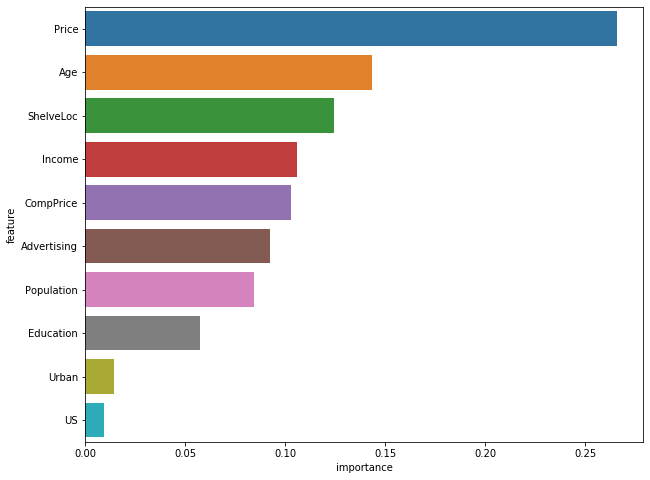

In [22]:
import seaborn as sns
# Create a dataframe to store the features and their corresponding
# importances
feature_rank = pd.DataFrame( { 'feature': x_train.columns,
                               'importance': clf_RF.feature_importances_ } )
## Sorting the features based on their importances with most
## important feature at top.
feature_rank = feature_rank.sort_values('importance', ascending = False)


plt.figure(figsize=(10,8))
sns.barplot( y = 'feature', x = 'importance', data = feature_rank );

### Conclusion

#### the test accuracy score is 80%  and train accuracy is 88% , so the data might be overfitted . 

#### the best features to drive more sales:
    a.Price
    b.Age
    c.Shelve Location
    d.Income